In [1]:
%load_ext autoreload
%autoreload 2

import ipynbname
import torch
import os
import warnings
import numpy as np
from xgboost import XGBClassifier
from libraries.classifier_utils import *
from libraries.embeddings_utils import *
from libraries.EmbeddingNet_utils import *
from libraries.retrieval_utils import *


project_dir = f"{os.getcwd().split('SIDS_revelation_project')[0]}SIDS_revelation_project/"
image_dataset_path = f"{project_dir}datasets/onback_onstomach_v3"
model_path_fd = f"{project_dir}/models/4.fd_weights/best.pt"
model_path_pe = f"{project_dir}/models/2.pe_weights/best.pt"

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

/home/terra/anaconda3/envs/SIDS_project/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Using device: cpu


In [2]:
emb_builder = EmbeddingBuilder(model_path_fd, image_dataset_path, "load",weights_path_pe=model_path_pe)


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 4158 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .csv----------------------------------------------------------------
Features loaded succesfully, in particular there are 4158 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/datasets/onback_onstomach_v3
Dataset dimension: 4158
Dataset labels: {'baby_safe': 0, 'baby_unsafe': 1}
------------------------------------------------------------------------------------------


## Best model with approach Features selection: xgbc

Best parameters:  {'colsample_bytree': np.float64(0.9942601816442402), 'gamma': np.float64(0.1210276357557502), 'learning_rate': np.float64(0.21164066422176356), 'max_depth': 5, 'n_estimators': 283, 'subsample': np.float64(0.6950550175969599)}

- Performance: 0.90 with all feature, 0.87 with 25_top_features, 0.84 with top_10_features

In [3]:
embeddings = emb_builder.create_embedding(flags=True,positions=True, positions_normalized=True, geometric_info=True,k_positions_normalized=True ,k_geometric_info=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration', 'x_nose_k', 'y_nose_k', 'x_left_eye_k', 'y_left_eye_k', 'x_right_eye_k', 'y_right_eye_k', 'x_left_ear', 'y_left_ear', 'x_right_ear', 'y_right_ear', 'x_left_shoulder', 'y_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'x_right_elbow', 'y_right_elbow', 'x_left_wrist', 'y_left_wrist', 'x_right_wrist', 'y_right_wrist', 'x_left_hip', 'y_left_hip', 'x_right_hip', 'y_right_hip', 'x_left_knee', 'y_left_knee', 'x_right_knee', 'y_right

In [4]:
embeddings.shape

(4158, 84)

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


/home/terra/anaconda3/envs/SIDS_project/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/terra/anaconda3/envs/SIDS_project/lib/python3.10/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'many

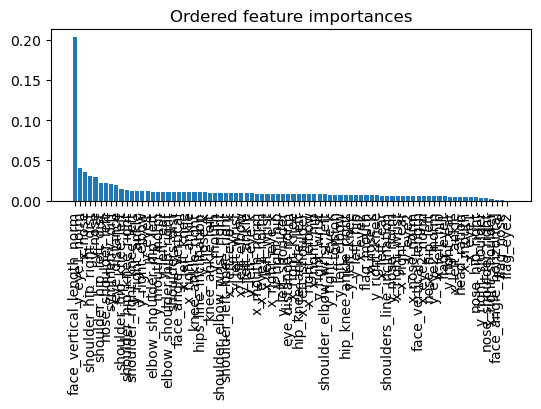

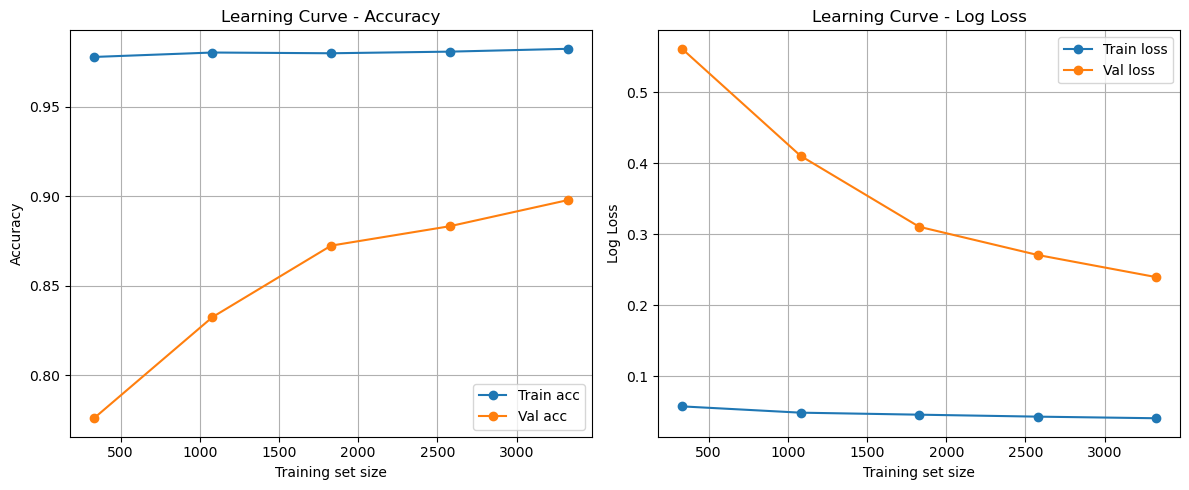


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.92      0.88      0.90       423
 baby_unsafe       0.88      0.92      0.90       409

    accuracy                           0.90       832
   macro avg       0.90      0.90      0.90       832
weighted avg       0.90      0.90      0.90       832

Confusion matrix---------------------------------------


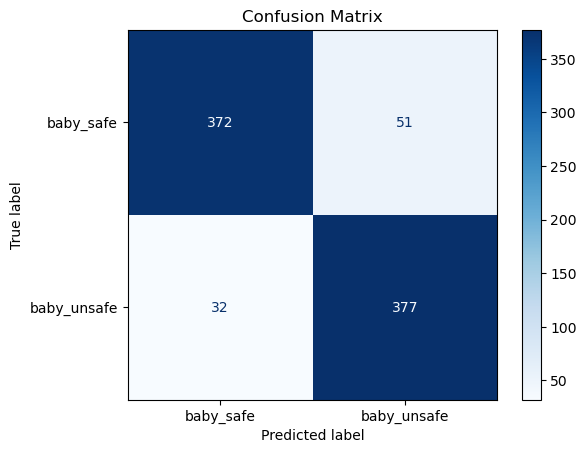

------------------------------------------------------------------------------------------
---------------------------------TOP 25 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


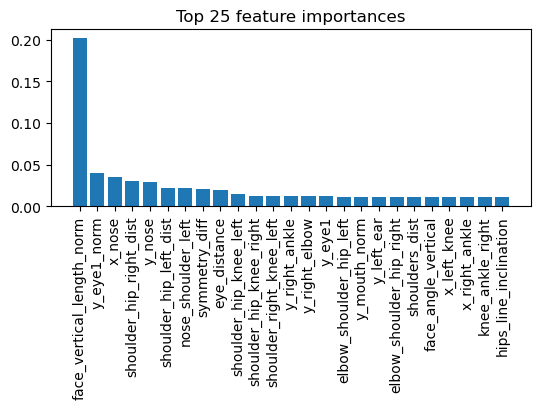

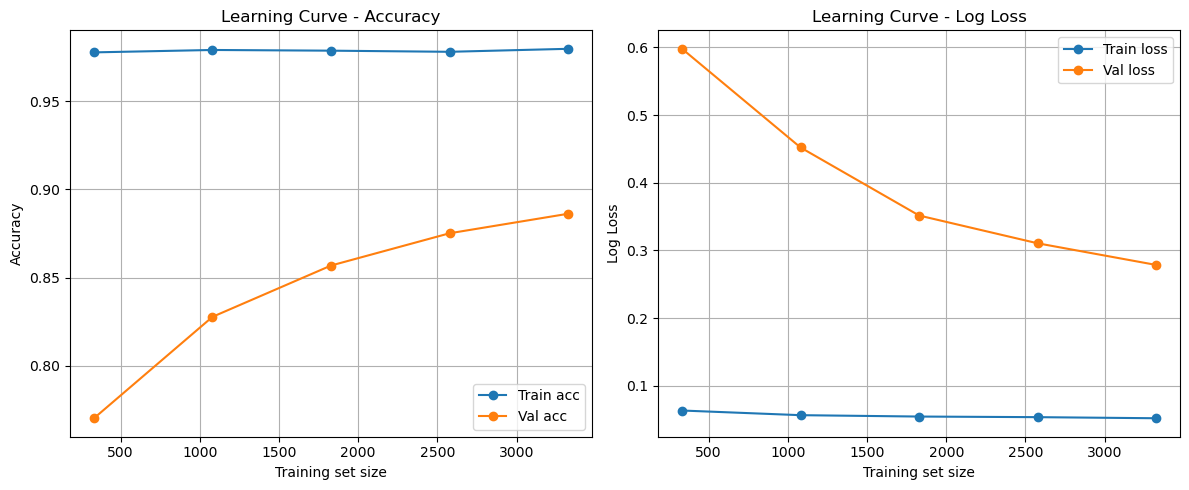


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.90      0.87      0.88       423
 baby_unsafe       0.87      0.89      0.88       409

    accuracy                           0.88       832
   macro avg       0.88      0.88      0.88       832
weighted avg       0.88      0.88      0.88       832

Confusion matrix---------------------------------------


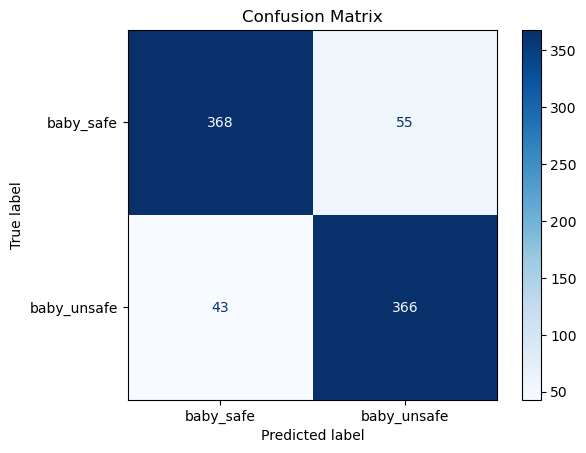

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


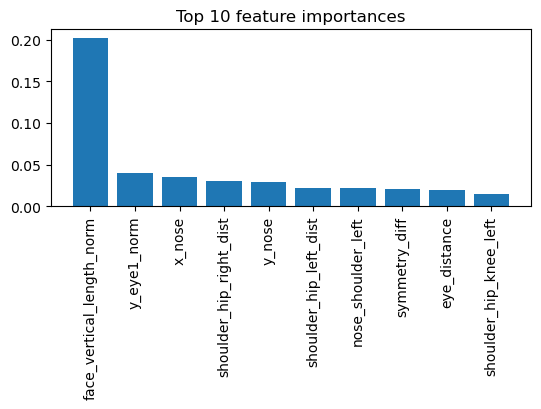

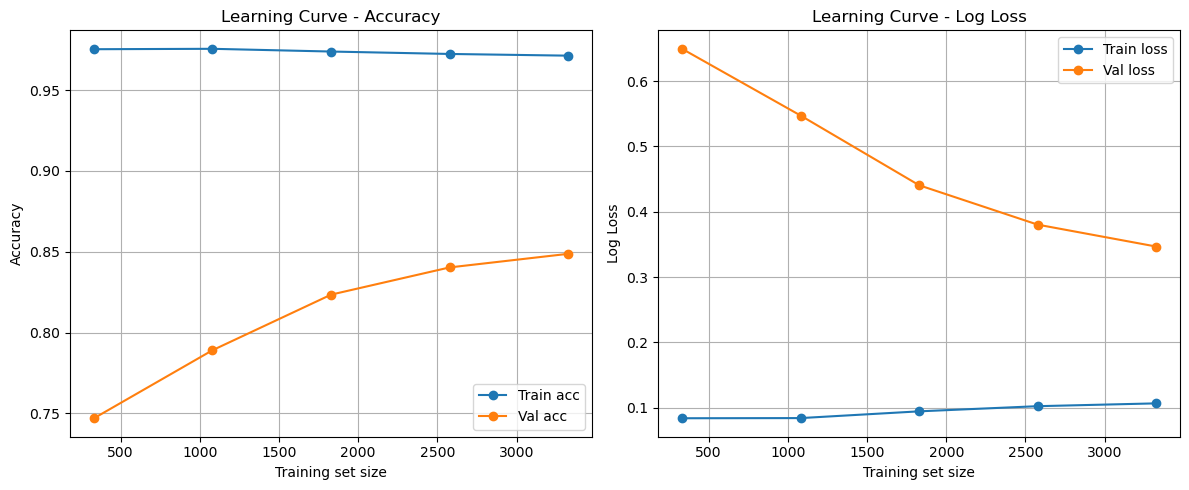


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.84      0.83      0.84       423
 baby_unsafe       0.83      0.84      0.83       409

    accuracy                           0.84       832
   macro avg       0.84      0.84      0.84       832
weighted avg       0.84      0.84      0.84       832

Confusion matrix---------------------------------------


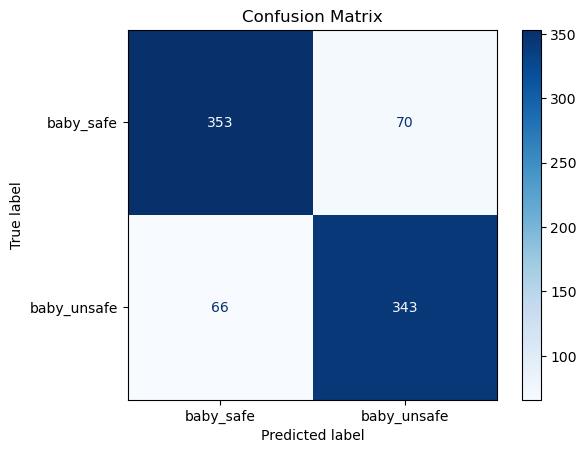

In [5]:
clf = Classifier(embeddings, emb_builder.y, emb_builder.classes_bs, image_paths=emb_builder.image_paths)

best_params = {
    'colsample_bytree': np.float64(0.9942601816442402),
    'gamma': np.float64(0.1210276357557502),
    'learning_rate': np.float64(0.21164066422176356),
    'max_depth': 5,
    'n_estimators': 283,
    'subsample': np.float64(0.6950550175969599),
    'use_label_encoder': False,  # necessario con sklearn>=1.0
    'eval_metric': 'logloss'
}
model = XGBClassifier(**best_params)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    results =clf.evaluation_pipeline_save_misclassified(model)

In [6]:
prediction = results["all_features"]["y_predicted"]
true_y= clf.y_test
misclassified = np.where(true_y != prediction)[0]

misclassified_images = [clf.images_paths_test[i] for i in misclassified]
image_dataset_path=emb_builder.dataset

folder_path = f"{project_dir}image_prediction/approach_features_selection/"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

from PIL import Image, ImageDraw, ImageFont

for img_path, prediction in zip(misclassified_images, prediction):
        img = Image.open(f"{image_dataset_path}/{img_path}")
        draw = ImageDraw.Draw(img)

        try:
            font = ImageFont.truetype("DejaVuSans-Bold.ttf", size=34)  # Imposta la dimensione del font
        except IOError:
            font = ImageFont.load_default()  # Usa il font di default se il file ttf non è trovato

        predicted_class = [key for key, value in emb_builder.classes_bs.items() if value == prediction][0]
        text = f"{predicted_class}"
        text_position = (50, 50)
        text_color = (255, 0, 0)
        draw.text(text_position, text, fill=text_color, font=font)

        new_image_path = f"{folder_path}{img_path}"
        img.save(new_image_path)

print(f"Misclassified images successfully saved in {folder_path}")

Misclassified images successfully saved in /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/image_prediction/approach_features_selection/


Precision at different k:-----------------------------------------------------------------


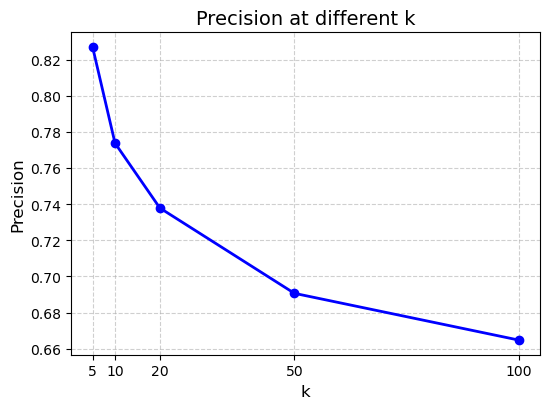


Recall at R-------------------------------------------------------------------------------
0.5500485315562994

Silhouette score--------------------------------------------------------------------------


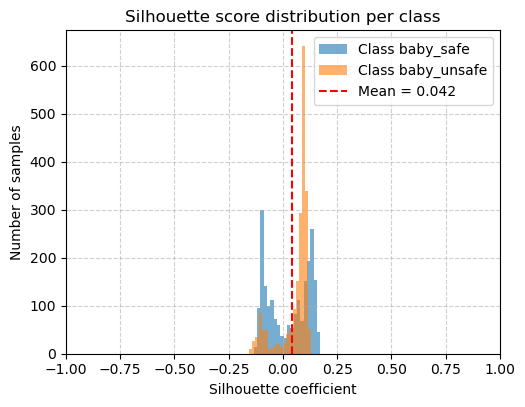

Silhouette score (euclidean): 0.042

Embeddings distributions------------------------------------------------------------------


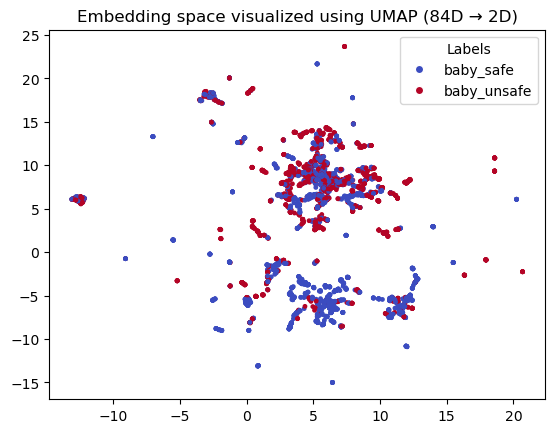

In [7]:
ret = ImageRetrieval(embeddings, emb_builder.y, emb_builder.image_paths, emb_builder.dataset, emb_builder.classes_bs)
ret.report('euclidean')

Image to retrieve


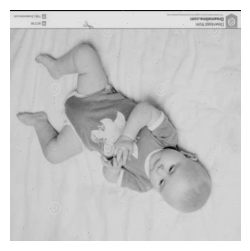

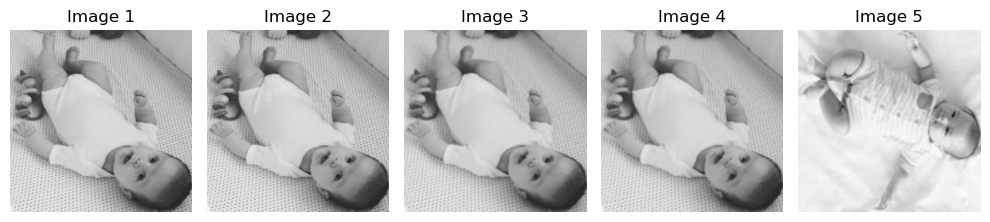

In [8]:
image_paths = emb_builder.image_paths
idx_query = 99
image_to_retrieve = f"{emb_builder.dataset}/{image_paths[idx_query]}"

print("Image to retrieve")
img = mpimg.imread(image_to_retrieve)
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.axis('off')
plt.show()

distances_all, image_paths_similar_all = ret.retrieve_similar(idx_query=idx_query,k=5,verbose=False)
ret.show_images(image_paths_similar_all)

## Best model with approach Supervised Learning Metric

XGBC with no optimization

In [9]:
embeddings = emb_builder.create_embedding(flags=True,positions=True, positions_normalized=True, geometric_info=True,k_positions_normalized=True ,k_geometric_info=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration', 'x_nose_k', 'y_nose_k', 'x_left_eye_k', 'y_left_eye_k', 'x_right_eye_k', 'y_right_eye_k', 'x_left_ear', 'y_left_ear', 'x_right_ear', 'y_right_ear', 'x_left_shoulder', 'y_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'x_right_elbow', 'y_right_elbow', 'x_left_wrist', 'y_left_wrist', 'x_right_wrist', 'y_right_wrist', 'x_left_hip', 'y_left_hip', 'x_right_hip', 'y_right_hip', 'x_left_knee', 'y_left_knee', 'x_right_knee', 'y_right

In [10]:
dataset = EmbeddingDataset(embeddings.to_numpy(),emb_builder.y,device=device)
model = dataset.train_embeddings(embed_dim=32, epochs=50, batch_size=128, lr=1e-3,verbose=False,weight_decay=1e-7,dropout_rate=0.05)

embeddings_new = dataset.extract_embeddings(model)
embeddings_new= pd.DataFrame(embeddings_new.to_numpy(), columns=[f"f_{i}" for i in range(embeddings_new.shape[1])])
clf = Classifier(embeddings_new, emb_builder.y, emb_builder.classes_bs, image_paths=emb_builder.image_paths)

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


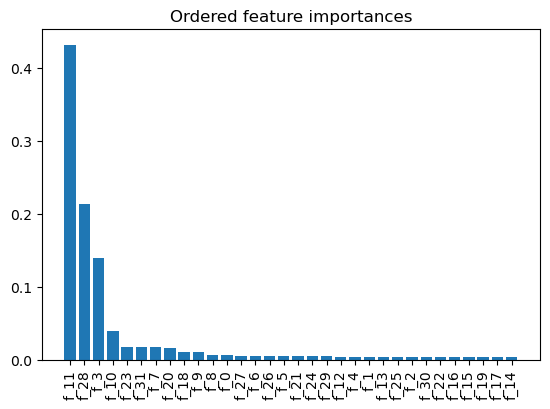

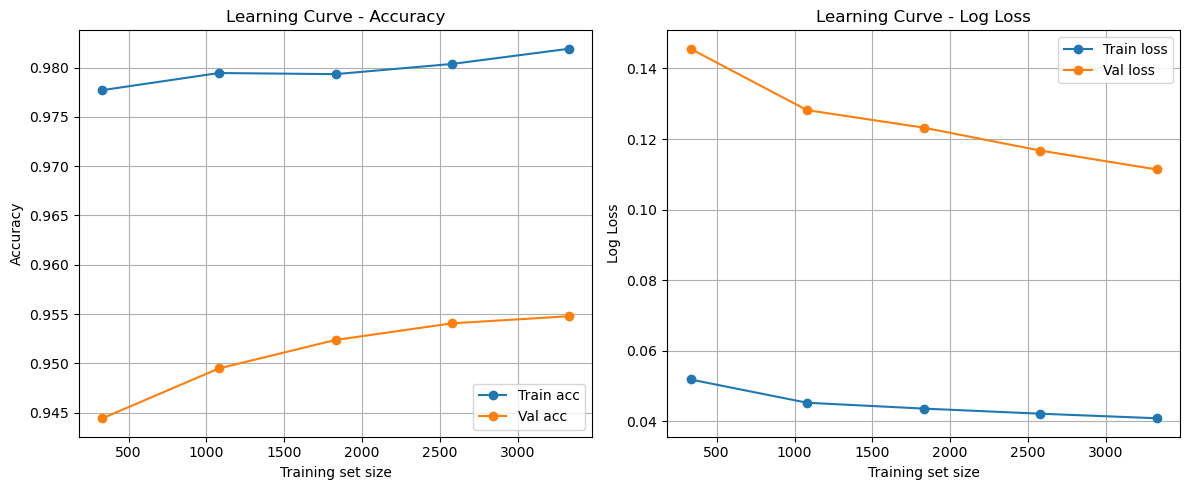


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.97      0.94      0.96       423
 baby_unsafe       0.94      0.97      0.96       409

    accuracy                           0.96       832
   macro avg       0.96      0.96      0.96       832
weighted avg       0.96      0.96      0.96       832

Confusion matrix---------------------------------------


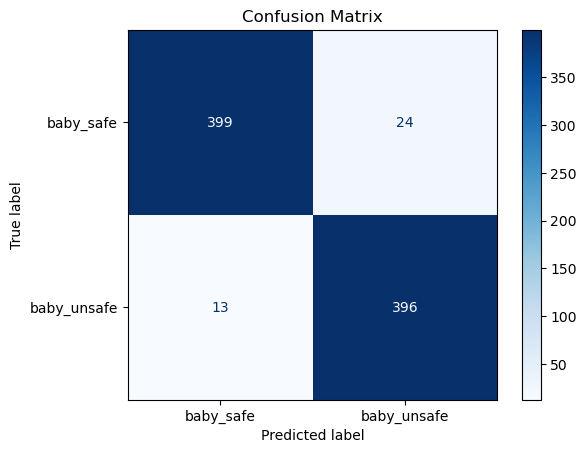

------------------------------------------------------------------------------------------
---------------------------------TOP 25 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


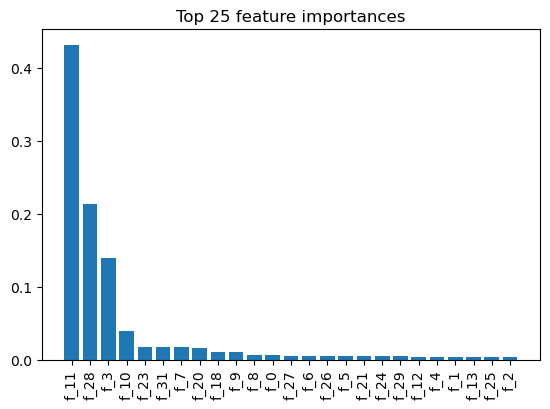

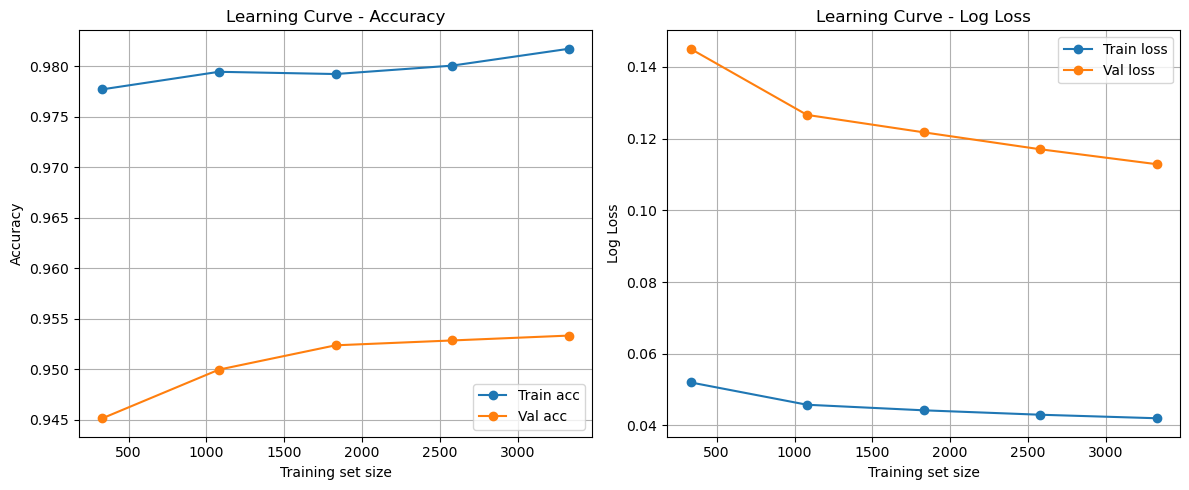


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.97      0.94      0.95       423
 baby_unsafe       0.94      0.97      0.95       409

    accuracy                           0.95       832
   macro avg       0.95      0.95      0.95       832
weighted avg       0.95      0.95      0.95       832

Confusion matrix---------------------------------------


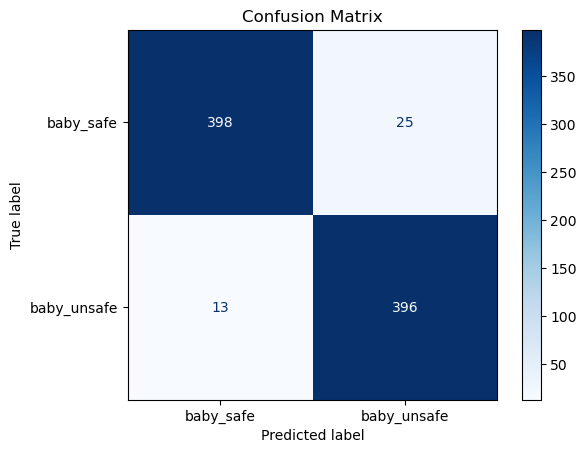

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


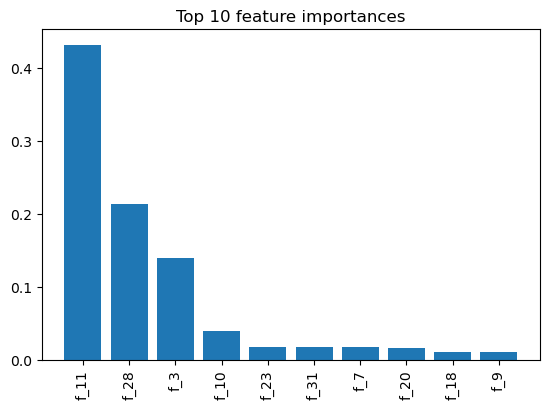

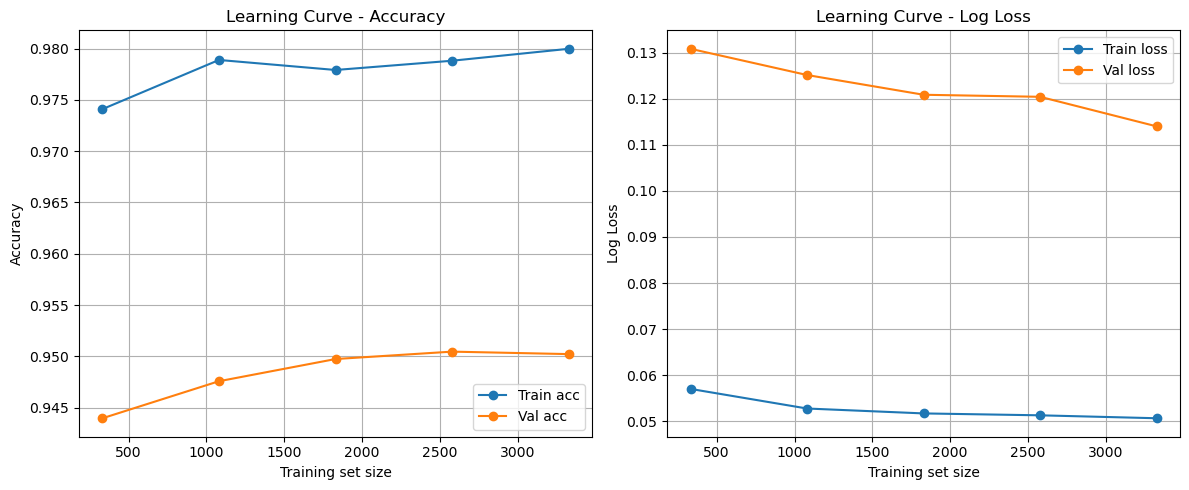


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.96      0.94      0.95       423
 baby_unsafe       0.94      0.96      0.95       409

    accuracy                           0.95       832
   macro avg       0.95      0.95      0.95       832
weighted avg       0.95      0.95      0.95       832

Confusion matrix---------------------------------------


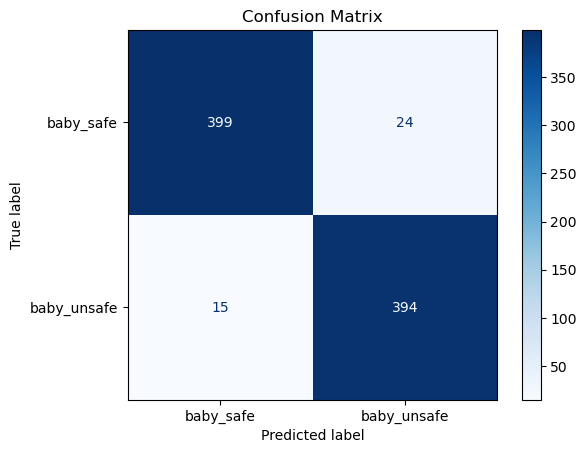

In [11]:
params = {
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_lambda': 1,
    'reg_alpha': 0.5,
    'random_state': None
}
model = XGBClassifier(**params)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    results =clf.evaluation_pipeline_save_misclassified(model)

In [12]:
prediction = results["all_features"]["y_predicted"]
true_y= clf.y_test
misclassified = np.where(true_y != prediction)[0]

misclassified_images = [clf.images_paths_test[i] for i in misclassified]
image_dataset_path=emb_builder.dataset

folder_path = f"{project_dir}image_prediction/approach_supervised_learning_metric/"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

from PIL import Image, ImageDraw, ImageFont

for img_path, prediction in zip(misclassified_images, prediction):
        img = Image.open(f"{image_dataset_path}/{img_path}")
        draw = ImageDraw.Draw(img)

        try:
            font = ImageFont.truetype("DejaVuSans-Bold.ttf", size=34)  # Imposta la dimensione del font
        except IOError:
            font = ImageFont.load_default()  # Usa il font di default se il file ttf non è trovato

        predicted_class = [key for key, value in emb_builder.classes_bs.items() if value == prediction][0]
        text = f"{predicted_class}"
        text_position = (50, 50)
        text_color = (255, 0, 0)
        draw.text(text_position, text, fill=text_color, font=font)

        new_image_path = f"{folder_path}{img_path}"
        img.save(new_image_path)

print(f"Misclassified images successfully saved in {folder_path}")

Misclassified images successfully saved in /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/image_prediction/approach_supervised_learning_metric/


Precision at different k:-----------------------------------------------------------------


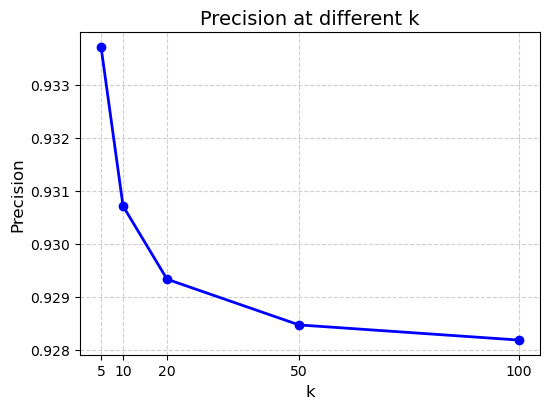


Recall at R-------------------------------------------------------------------------------
0.8813770233235899

Silhouette score--------------------------------------------------------------------------


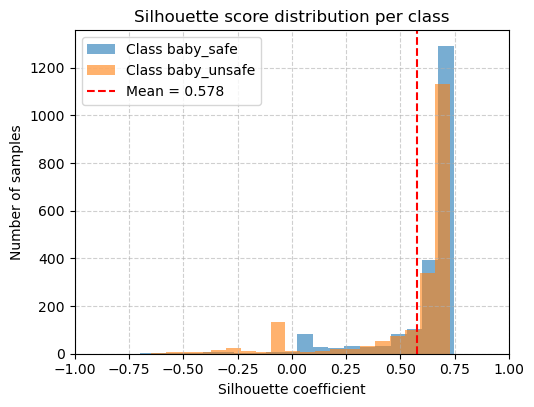

Silhouette score (euclidean): 0.578

Embeddings distributions------------------------------------------------------------------


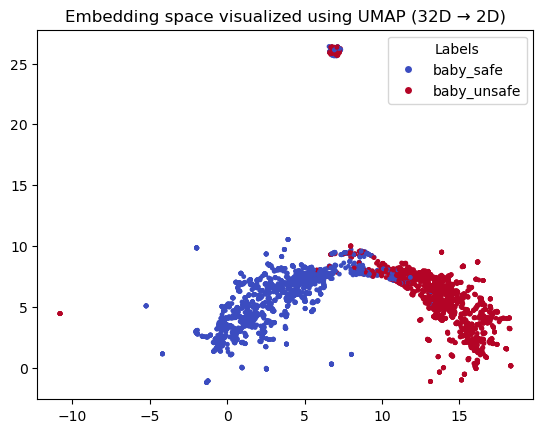

In [13]:
ret = ImageRetrieval(embeddings_new, emb_builder.y, emb_builder.image_paths, emb_builder.dataset, emb_builder.classes_bs)
ret.report('euclidean')

Image to retrieve


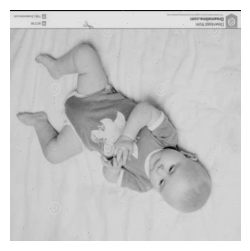

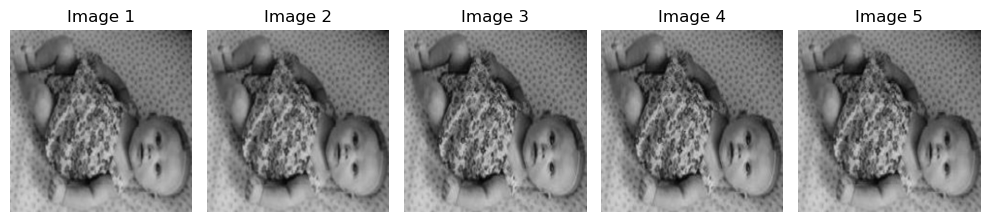

In [14]:
image_paths = emb_builder.image_paths
idx_query = 99
image_to_retrieve = f"{emb_builder.dataset}/{image_paths[idx_query]}"

print("Image to retrieve")
img = mpimg.imread(image_to_retrieve)
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.axis('off')
plt.show()

distances_all, image_paths_similar_all = ret.retrieve_similar(idx_query=idx_query,k=5,verbose=False)
ret.show_images(image_paths_similar_all)

## Best model with approach Supervised Learning Metric

XGBC with optimization

Best parameters : {'colsample_bytree': np.float64(0.6547542520275229),
'gamma': np.float64(0.45000932092405255), 'learning_rate':
np.float64(0.2721670232687546), 'max_depth': 4, 'n_estimators': 367,
'subsample': np.float64(0.853239225342979)}
Best mean cross-validation accuracy: 0.9735415114362482

In [15]:
embeddings = emb_builder.create_embedding(flags=True,positions=True, positions_normalized=True, geometric_info=True,k_positions_normalized=True ,k_geometric_info=True)


Embedding creation------------------------------------------------------------------------
Features: ['flag_eye1', 'flag_eye2', 'flag_nose', 'flag_mouth', 'x_eye1', 'y_eye1', 'x_eye2', 'y_eye2', 'x_nose', 'y_nose', 'x_mouth', 'y_mouth', 'x_eye1_norm', 'y_eye1_norm', 'x_eye2_norm', 'y_eye2_norm', 'x_nose_norm', 'y_nose_norm', 'x_mouth_norm', 'y_mouth_norm', 'eye_distance', 'eye_distance_norm', 'face_vertical_length', 'face_vertical_length_norm', 'face_angle_vertical', 'face_angle_horizontal', 'symmetry_diff', 'head_ration', 'x_nose_k', 'y_nose_k', 'x_left_eye_k', 'y_left_eye_k', 'x_right_eye_k', 'y_right_eye_k', 'x_left_ear', 'y_left_ear', 'x_right_ear', 'y_right_ear', 'x_left_shoulder', 'y_left_shoulder', 'x_right_shoulder', 'y_right_shoulder', 'x_left_elbow', 'y_left_elbow', 'x_right_elbow', 'y_right_elbow', 'x_left_wrist', 'y_left_wrist', 'x_right_wrist', 'y_right_wrist', 'x_left_hip', 'y_left_hip', 'x_right_hip', 'y_right_hip', 'x_left_knee', 'y_left_knee', 'x_right_knee', 'y_right

In [16]:
dataset = EmbeddingDataset(embeddings.to_numpy(),emb_builder.y,device=device)
model = dataset.train_embeddings(embed_dim=32, epochs=50, batch_size=128, lr=1e-3,verbose=False,weight_decay=1e-7,dropout_rate=0.05)

embeddings_new = dataset.extract_embeddings(model)
embeddings_new= pd.DataFrame(embeddings_new.to_numpy(), columns=[f"f_{i}" for i in range(embeddings_new.shape[1])])
clf = Classifier(embeddings_new, emb_builder.y, emb_builder.classes_bs, image_paths=emb_builder.image_paths)

------------------------------------------------------------------------------------------
--------------------------------------FIRST ANALYSIS--------------------------------------
------------------------------------------------------------------------------------------


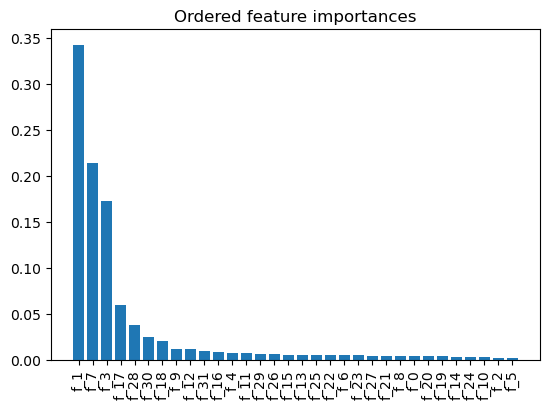

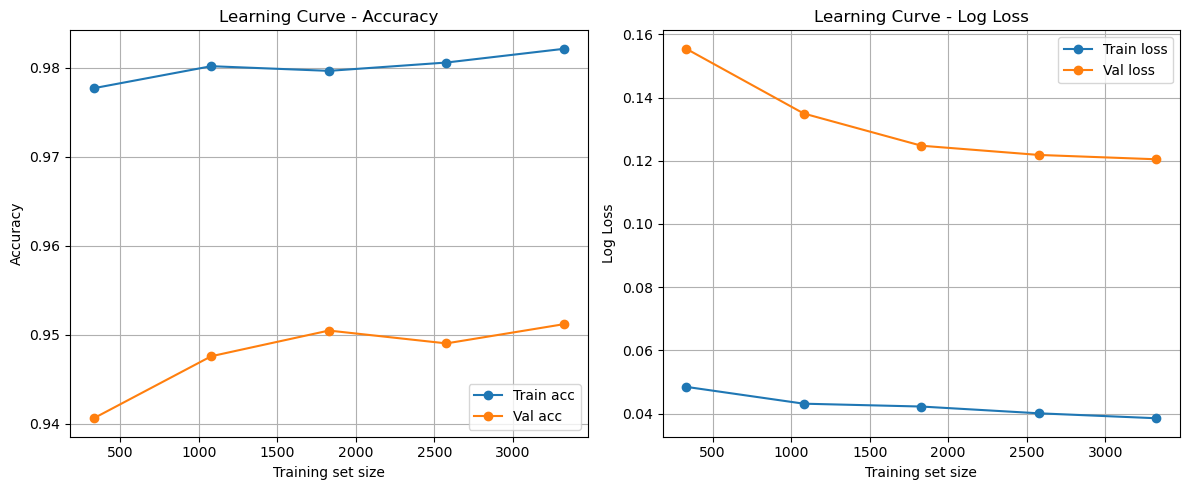


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.97      0.93      0.95       423
 baby_unsafe       0.93      0.97      0.95       409

    accuracy                           0.95       832
   macro avg       0.95      0.95      0.95       832
weighted avg       0.95      0.95      0.95       832

Confusion matrix---------------------------------------


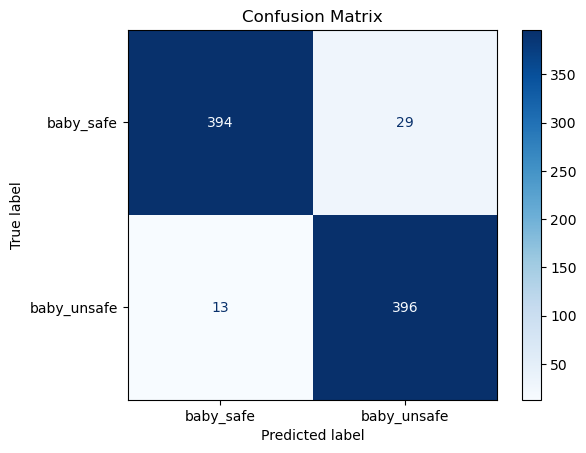

------------------------------------------------------------------------------------------
---------------------------------TOP 25 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


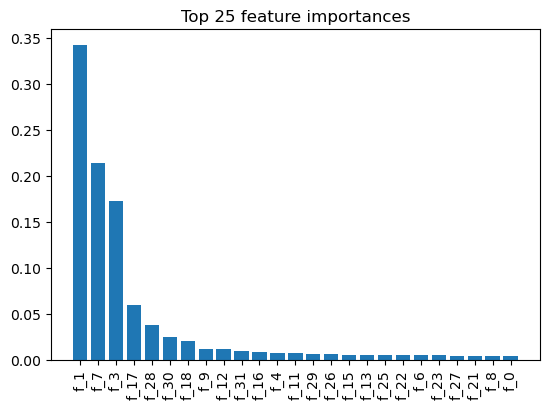

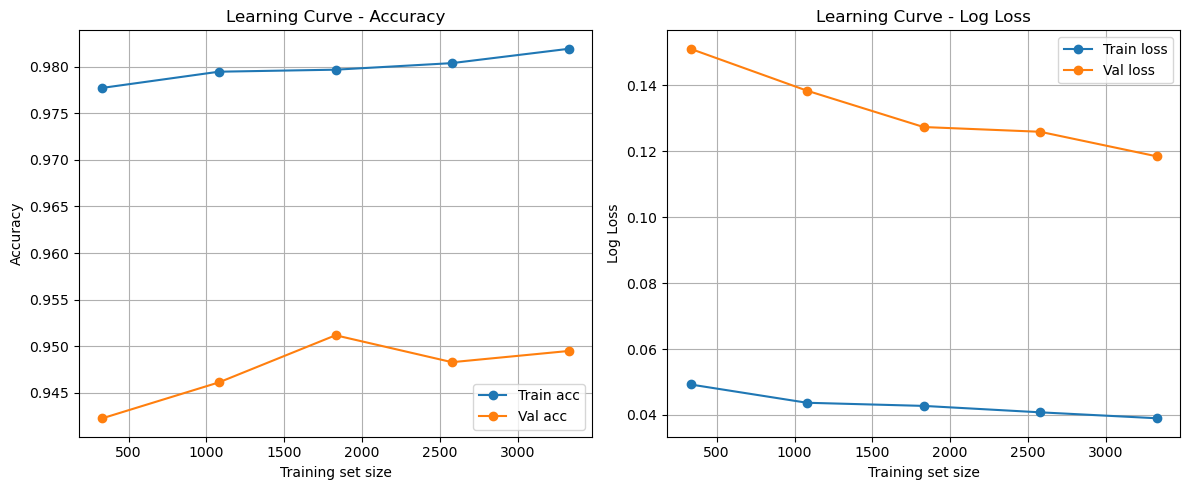


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.96      0.93      0.95       423
 baby_unsafe       0.93      0.96      0.95       409

    accuracy                           0.95       832
   macro avg       0.95      0.95      0.95       832
weighted avg       0.95      0.95      0.95       832

Confusion matrix---------------------------------------


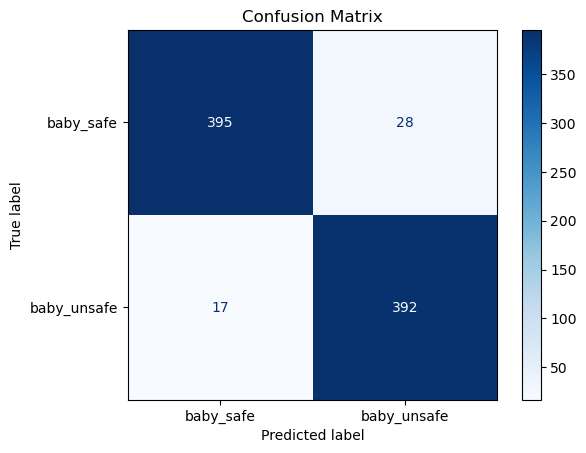

------------------------------------------------------------------------------------------
---------------------------------TOP 10 FEATURES ANALYSIS---------------------------------
------------------------------------------------------------------------------------------


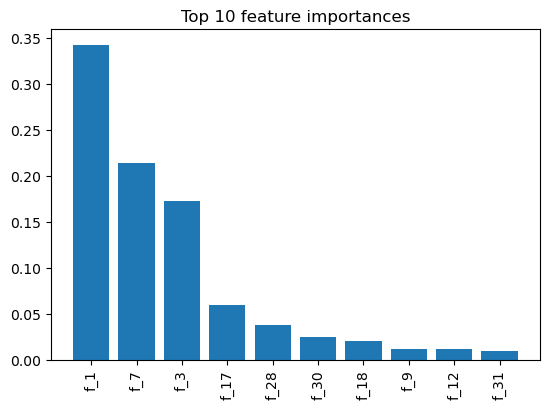

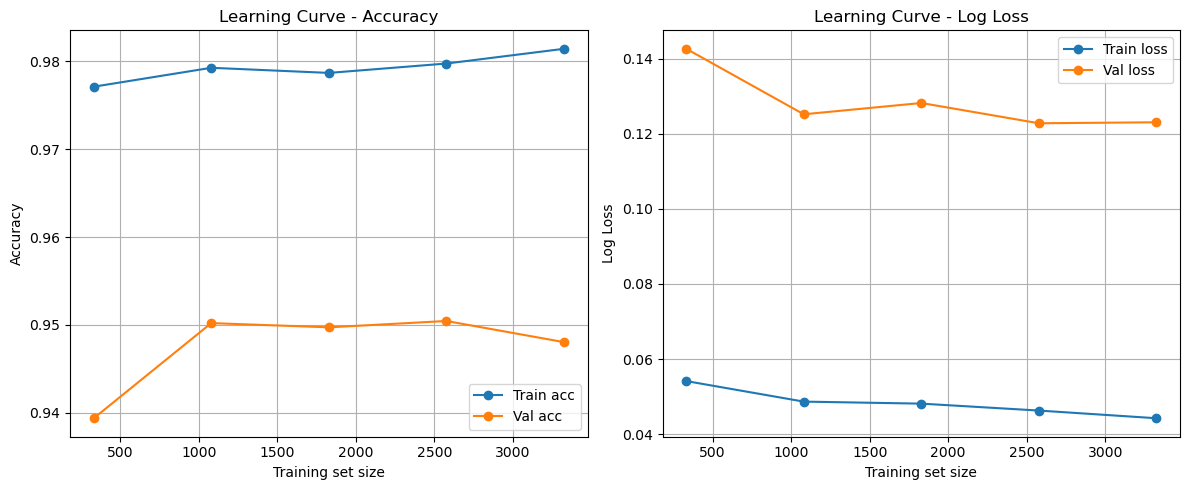


Dataset labels:----------------------------------------
{'baby_safe': 0, 'baby_unsafe': 1}

Report-------------------------------------------------
              precision    recall  f1-score   support

   baby_safe       0.96      0.93      0.95       423
 baby_unsafe       0.93      0.96      0.95       409

    accuracy                           0.95       832
   macro avg       0.95      0.95      0.95       832
weighted avg       0.95      0.95      0.95       832

Confusion matrix---------------------------------------


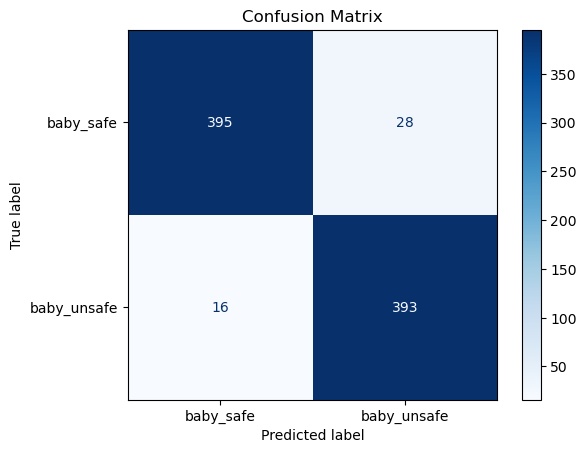

In [17]:
best_params =  {
    'colsample_bytree': np.float64(0.6547542520275229),
    'gamma': np.float64(0.45000932092405255),
    'learning_rate': np.float64(0.2721670232687546),
    'max_depth': 4,
    'n_estimators': 367,
    'subsample': np.float64(0.853239225342979)
}
model = XGBClassifier(**best_params)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    results =clf.evaluation_pipeline_save_misclassified(model)

In [18]:
prediction = results["all_features"]["y_predicted"]
true_y= clf.y_test
misclassified = np.where(true_y != prediction)[0]

misclassified_images = [clf.images_paths_test[i] for i in misclassified]
image_dataset_path=emb_builder.dataset

folder_path = f"{project_dir}image_prediction/approach_supervised_learning_metric_optimized/"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

from PIL import Image, ImageDraw, ImageFont

for img_path, prediction in zip(misclassified_images, prediction):
        img = Image.open(f"{image_dataset_path}/{img_path}")
        draw = ImageDraw.Draw(img)

        try:
            font = ImageFont.truetype("DejaVuSans-Bold.ttf", size=34)  # Imposta la dimensione del font
        except IOError:
            font = ImageFont.load_default()  # Usa il font di default se il file ttf non è trovato

        predicted_class = [key for key, value in emb_builder.classes_bs.items() if value == prediction][0]
        text = f"{predicted_class}"
        text_position = (50, 50)
        text_color = (255, 0, 0)
        draw.text(text_position, text, fill=text_color, font=font)

        new_image_path = f"{folder_path}{img_path}"
        img.save(new_image_path)

print(f"Misclassified images successfully saved in {folder_path}")

Misclassified images successfully saved in /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/image_prediction/approach_supervised_learning_metric_optimized/


Retrieval is invariant, same embeddings as previous point

Precision at different k:-----------------------------------------------------------------


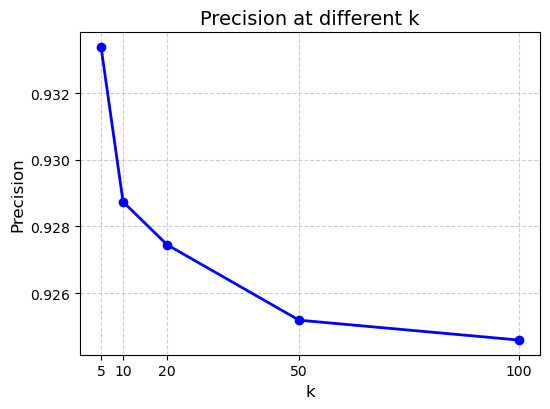


Recall at R-------------------------------------------------------------------------------
0.8807092462231622

Silhouette score--------------------------------------------------------------------------


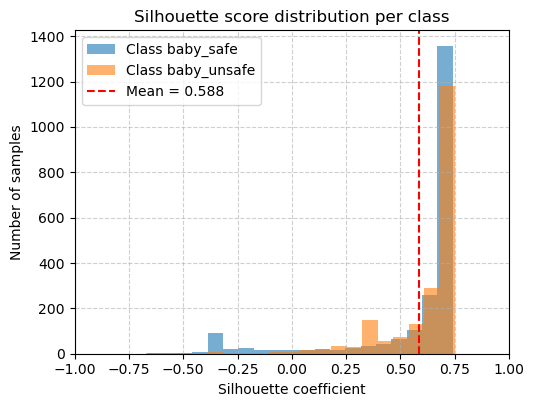

Silhouette score (euclidean): 0.588

Embeddings distributions------------------------------------------------------------------


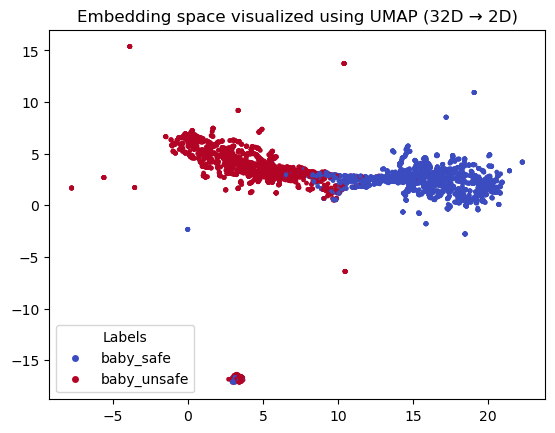

In [19]:
ret = ImageRetrieval(embeddings_new, emb_builder.y, emb_builder.image_paths, emb_builder.dataset, emb_builder.classes_bs)
ret.report('euclidean')

Image to retrieve


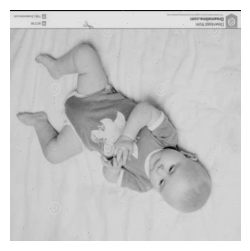

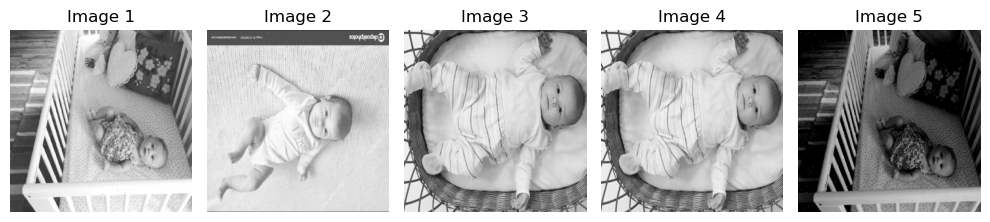

In [20]:
image_paths = emb_builder.image_paths
idx_query = 99
image_to_retrieve = f"{emb_builder.dataset}/{image_paths[idx_query]}"

print("Image to retrieve")
img = mpimg.imread(image_to_retrieve)
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.axis('off')
plt.show()

distances_all, image_paths_similar_all = ret.retrieve_similar(idx_query=idx_query,k=5,verbose=False)
ret.show_images(image_paths_similar_all)

In [22]:
from libraries.file_manager_utils import *
save_as_pdf(ipynbname.path())

[NbConvertApp] Converting notebook /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/full_pipeline/best_classifiers.ipynb to pdf
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('jetTransient' was unexpected)

Failed validating 'additionalProperties' in display_data:

On instance['cells'][5]['outputs'][2]:
{'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAh0AAAGZCAYAAAAtqYO0AAAAOnRFWHRTb2Z0d2Fy...',
          'text/plain': '<Figure size 560x420 with 1 Axes>'},
 'jetTransient': {'display_id': None},
 'metadata': {},
 'output_type': 'display_data'}
[NbConvertApp] Support files will be in /home/terra/Desktop/unimore/AI_engineering/SIDS_revelation_project/full_pipeline/reports/best_classifiers(2025-10-04)_files/
[NbConvertApp] Writing 96597 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConver